Name: Harshith Akkapelli

Task-7: Graph Dataset

Dataset: [cit-HepPh Graph (SNAP)](https://www.kaggle.com/datasets/wolfram77/graph-snap-cit-hepph?select=cit-HepPh.txt)

### **Loading Data**

In [ ]:
import zipfile
import os

# File path for the uploaded zip file
zip_file_path = '/content/Dataset_7.zip'
extract_folder_path = '/content/Dataset_7'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

# Listing the contents of the unzipped folder
extracted_files = os.listdir(extract_folder_path)
extracted_files


['cit-HepPh-temporal.txt', 'cit-HepPh.txt', 'cit-HepPh-dates.txt']

In [ ]:
# Function to read the first few lines of a file for preview
def preview_file(file_path, num_lines=5):
    with open(file_path, 'r') as file:
        preview_lines = [next(file) for _ in range(num_lines)]
    return preview_lines

# Previewing the contents of each file
preview_cit_HepPh = preview_file(f'{extract_folder_path}/cit-HepPh.txt')
preview_cit_HepPh_dates = preview_file(f'{extract_folder_path}/cit-HepPh-dates.txt')
preview_cit_HepPh_temporal = preview_file(f'{extract_folder_path}/cit-HepPh-temporal.txt')

preview_cit_HepPh, preview_cit_HepPh_dates, preview_cit_HepPh_temporal


(['# Directed graph (each unordered pair of nodes is saved once): Cit-HepPh.txt \n',
  '# Paper citation network of Arxiv High Energy Physics category\n',
  '# Nodes: 34546 Edges: 421578\n',
  '# FromNodeId\tToNodeId\n',
  '9907233\t9301253\n'],
 ['# cross-listed papers have ids 11<true_id>\n',
  '9203201\t1992-02-24\n',
  '9203202\t1992-03-08\n',
  '9203203\t1992-03-03\n',
  '9203204\t1992-03-09\n'],
 ['203110 2279 0\n',
  '203110 8085 0\n',
  '203110 10348 0\n',
  '203110 12333 0\n',
  '203110 102101 0\n'])

In [ ]:
import pandas as pd

# Loading the data from files into pandas DataFrames
# cit-HepPh.txt - Citation graph data
df_citations = pd.read_csv(f'{extract_folder_path}/cit-HepPh.txt', sep='\t', comment='#', header=None, names=['Citing', 'Cited'])

# cit-HepPh-dates.txt - Publication dates of the papers
df_dates = pd.read_csv(f'{extract_folder_path}/cit-HepPh-dates.txt', sep='\t', header=None, names=['PaperID', 'Date'])

# cit-HepPh-temporal.txt - Temporal edges information
# Need to investigate the structure further, starting with the assumption of three columns
df_temporal = pd.read_csv(f'{extract_folder_path}/cit-HepPh-temporal.txt', sep=' ', header=None, names=['Node1', 'Node2', 'TemporalInfo'])

# Displaying the first few rows of each DataFrame for inspection
(df_citations.head(), df_dates.head(), df_temporal.head())


(    Citing    Cited
 0  9907233  9301253
 1  9907233  9504304
 2  9907233  9505235
 3  9907233  9506257
 4  9907233  9606402,
                                       PaperID        Date
 0  # cross-listed papers have ids 11<true_id>         NaN
 1                                     9203201  1992-02-24
 2                                     9203202  1992-03-08
 3                                     9203203  1992-03-03
 4                                     9203204  1992-03-09,
     Node1   Node2  TemporalInfo
 0  203110    2279             0
 1  203110    8085             0
 2  203110   10348             0
 3  203110   12333             0
 4  203110  102101             0)

### **EDA**

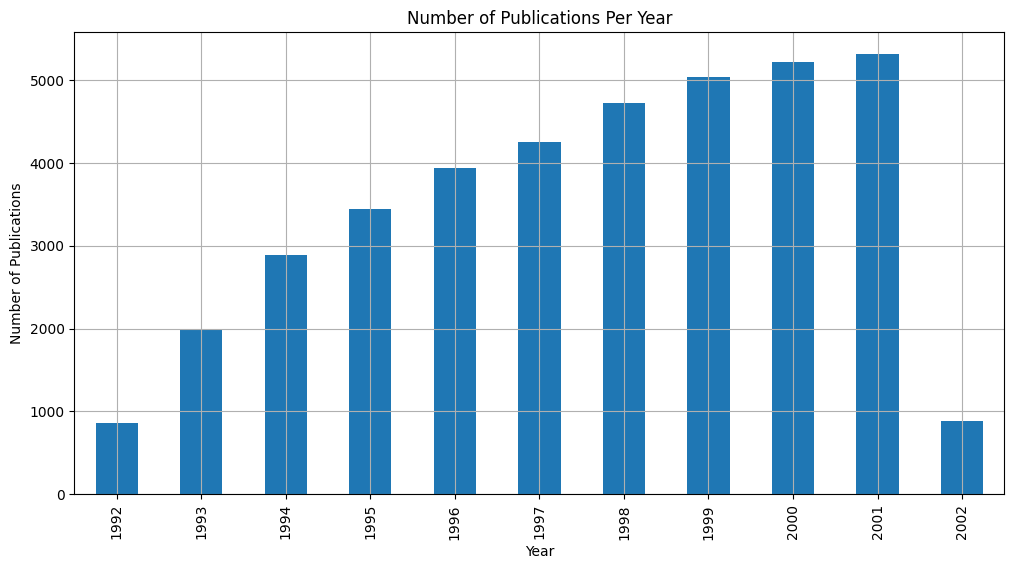

(0,
 1992     855
 1993    1997
 1994    2894
 1995    3444
 1996    3939
 1997    4252
 1998    4721
 1999    5041
 2000    5219
 2001    5313
 2002     882
 Name: Year, dtype: int64)

In [ ]:
import matplotlib.pyplot as plt

# Cleaning the Dates DataFrame
# Removing the non-data row
df_dates_cleaned = df_dates[1:].copy()  # Skip the first row which is a comment

# Converting the 'Date' column to datetime
df_dates_cleaned['Date'] = pd.to_datetime(df_dates_cleaned['Date'], errors='coerce')

# Checking for null values after conversion
null_dates = df_dates_cleaned['Date'].isnull().sum()

# Analysis of publication date distribution
# Plotting the number of publications per year
df_dates_cleaned['Year'] = df_dates_cleaned['Date'].dt.year
publications_per_year = df_dates_cleaned['Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
publications_per_year.plot(kind='bar')
plt.title('Number of Publications Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.show()

null_dates, publications_per_year


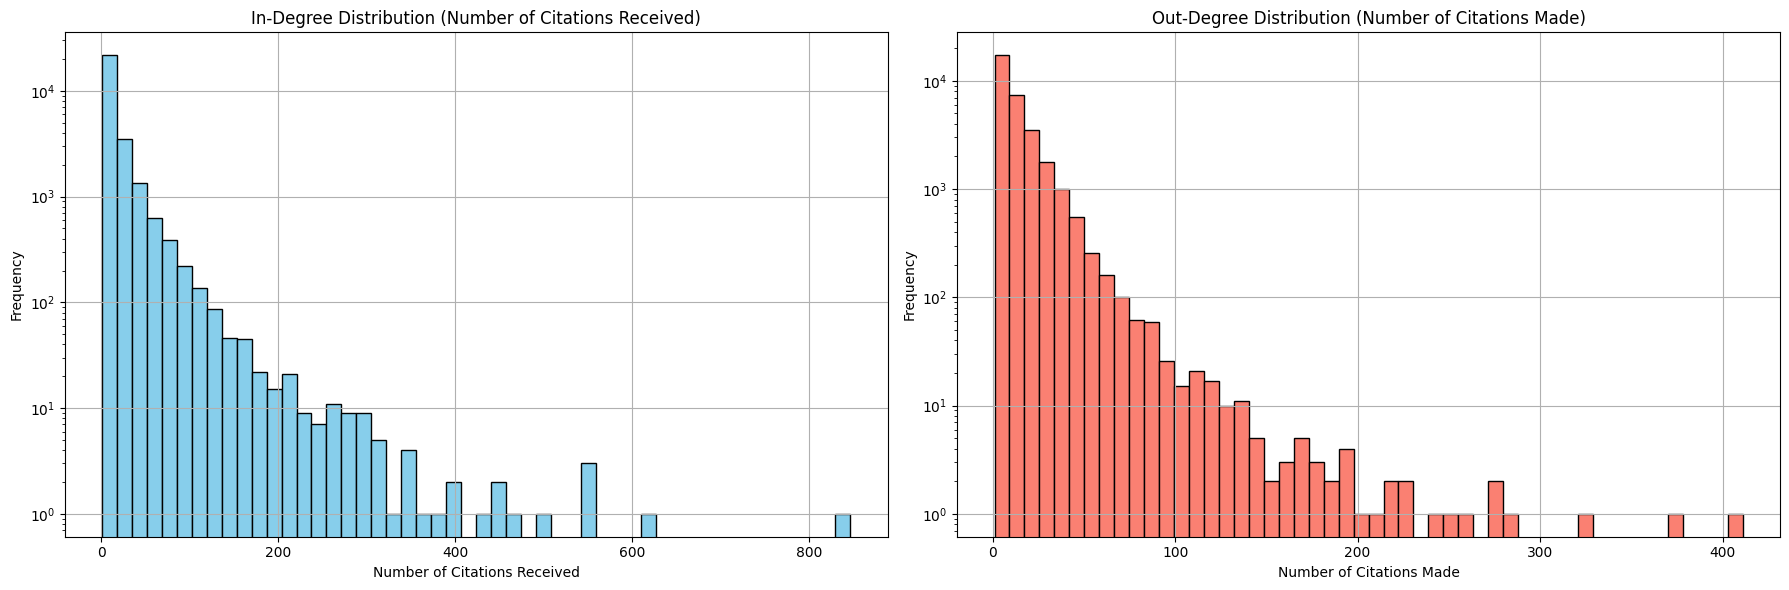

(Citing    0
 Cited     0
 dtype: int64,
 count    28230.000000
 mean        14.933688
 std         27.286042
 min          1.000000
 25%          2.000000
 50%          6.000000
 75%         16.000000
 max        846.000000
 Name: Cited, dtype: float64,
 count    32158.000000
 mean        13.109584
 std         15.398596
 min          1.000000
 25%          4.000000
 50%          9.000000
 75%         17.000000
 max        411.000000
 Name: Citing, dtype: float64)

In [ ]:
# EDA for Citations DataFrame (df_citations)

# 1. Checking for Missing/Anomalous Values
missing_values_citations = df_citations.isnull().sum()

# 2. Analyzing Citation Distribution
# Calculating in-degree (number of times a paper is cited)
in_degree = df_citations['Cited'].value_counts()

# Calculating out-degree (number of citations made by a paper)
out_degree = df_citations['Citing'].value_counts()

# Plotting the distributions
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# In-Degree Distribution
ax[0].hist(in_degree, bins=50, color='skyblue', edgecolor='black')
ax[0].set_title('In-Degree Distribution (Number of Citations Received)')
ax[0].set_xlabel('Number of Citations Received')
ax[0].set_ylabel('Frequency')
ax[0].set_yscale('log')  # Log scale due to heavy-tailed distribution
ax[0].grid(True)

# Out-Degree Distribution
ax[1].hist(out_degree, bins=50, color='salmon', edgecolor='black')
ax[1].set_title('Out-Degree Distribution (Number of Citations Made)')
ax[1].set_xlabel('Number of Citations Made')
ax[1].set_ylabel('Frequency')
ax[1].set_yscale('log')  # Log scale
ax[1].grid(True)

plt.tight_layout()
plt.show()

missing_values_citations, in_degree.describe(), out_degree.describe()


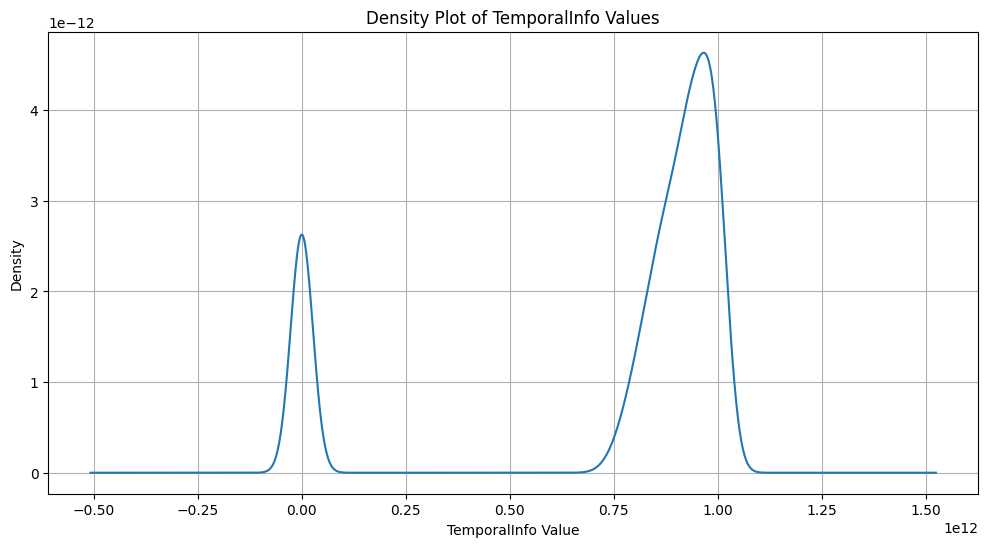

In [ ]:
# Attempting a different visualization for the TemporalInfo column - using a density plot
plt.figure(figsize=(12, 6))
df_temporal['TemporalInfo'].plot(kind='density')
plt.title('Density Plot of TemporalInfo Values')
plt.xlabel('TemporalInfo Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [ ]:
# Checking for Missing/Anomalous Values in the Temporal DataFrame
missing_values_temporal = df_temporal.isnull().sum()
missing_values_temporal


Node1           0
Node2           0
TemporalInfo    0
dtype: int64

In [ ]:
# Descriptive Statistics for each DataFrame

# Dates DataFrame - Descriptive stats for the 'Year' column
dates_desc_stats = df_dates_cleaned['Year'].describe()

# Citations DataFrame - Descriptive stats for in-degree and out-degree
citations_in_degree_desc_stats = in_degree.describe()
citations_out_degree_desc_stats = out_degree.describe()

# Temporal DataFrame - Descriptive stats for the 'TemporalInfo' column
temporal_info_desc_stats = df_temporal['TemporalInfo'].describe()

dates_desc_stats, citations_in_degree_desc_stats, citations_out_degree_desc_stats, temporal_info_desc_stats


(count    38557.000000
 mean      1997.631533
 std          2.599928
 min       1992.000000
 25%       1996.000000
 50%       1998.000000
 75%       2000.000000
 max       2002.000000
 Name: Year, dtype: float64,
 count    28230.000000
 mean        14.933688
 std         27.286042
 min          1.000000
 25%          2.000000
 50%          6.000000
 75%         16.000000
 max        846.000000
 Name: Cited, dtype: float64,
 count    32158.000000
 mean        13.109584
 std         15.398596
 min          1.000000
 25%          4.000000
 50%          9.000000
 75%         17.000000
 max        411.000000
 Name: Citing, dtype: float64,
 count    4.215780e+05
 mean     7.597103e+11
 std      3.559793e+11
 min      0.000000e+00
 25%      8.224416e+11
 50%      9.112608e+11
 75%      9.675072e+11
 max      1.015891e+12
 Name: TemporalInfo, dtype: float64)

In [ ]:
# Correlation Analysis for Temporal DataFrame
temporal_correlation = df_temporal.corr()

temporal_correlation


,Node1,Node2,TemporalInfo
Node1,1.000000,0.422314,0.310084
Node2,0.422314,1.000000,0.333351
TemporalInfo,0.310084,0.333351,1.000000


In [ ]:
import networkx as nx

# Constructing a directed graph from the Citations DataFrame
G = nx.from_pandas_edgelist(df_citations, source='Citing', target='Cited', create_using=nx.DiGraph())

# Calculating Network Statistics
# 1. Average In-Degree and Out-Degree
average_in_degree = sum(dict(G.in_degree()).values()) / float(G.number_of_nodes())
average_out_degree = sum(dict(G.out_degree()).values()) / float(G.number_of_nodes())

# 2. Network Density
network_density = nx.density(G)

# 3. Centrality Measures - Calculating PageRank as an example
pagerank = nx.pagerank(G, max_iter=100)

# Getting the top 5 papers with highest PageRank scores
top_5_papers_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]

average_in_degree, average_out_degree, network_density, top_5_papers_pagerank


(12.203380999247381,
 12.203380999247381,
 0.00035326041393102855,
 [(9303255, 0.003655215622620554),
  (9209205, 0.0027529807126590393),
  (9310316, 0.002503890641007016),
  (9206203, 0.002256728200516269),
  (9208254, 0.002166528431306826)])

### **Data Preparation - Data Cleaning, Data Preprocessing, Feature Processing and selection**

In [ ]:
# Data Cleaning

# Checking for and removing any duplicate entries in the Citations DataFrame
df_citations_cleaned = df_citations.drop_duplicates()

# Checking the shape of the DataFrames before and after cleaning for comparison
original_shape = df_citations.shape
cleaned_shape = df_citations_cleaned.shape

original_shape, cleaned_shape


((421578, 2), (421578, 2))

In [ ]:
# Feature Processing for the Citation Network

# Computing the Clustering Coefficient for each node
clustering_coefficient = nx.clustering(G)

# We already have PageRank, In-Degree, and Out-Degree
# Converting these metrics into a DataFrame
network_features_df = pd.DataFrame({
    'PageRank': pd.Series(pagerank),
    'InDegree': pd.Series(dict(G.in_degree())),
    'OutDegree': pd.Series(dict(G.out_degree())),
    'ClusteringCoefficient': pd.Series(clustering_coefficient)
})

# Resetting index to have the PaperID as a column
network_features_df.reset_index(inplace=True)
network_features_df.rename(columns={'index': 'PaperID'}, inplace=True)

network_features_df.head()


,PaperID,PageRank,InDegree,OutDegree,ClusteringCoefficient
0,9907233,0.000011,3,11,0.131868
1,9301253,0.000855,59,0,0.061660
2,9504304,0.000072,33,0,0.063447
3,9505235,0.000057,23,0,0.106719
4,9506257,0.000017,10,1,0.027273


In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling for the network features
scaler = StandardScaler()

# Applying scaling to the network features (excluding 'PaperID' which is just an identifier)
network_features_df_scaled = network_features_df.copy()
network_features_df_scaled[['PageRank', 'InDegree', 'OutDegree', 'ClusteringCoefficient']] = scaler.fit_transform(
    network_features_df_scaled[['PageRank', 'InDegree', 'OutDegree', 'ClusteringCoefficient']]
)

network_features_df_scaled.head()


,PaperID,PageRank,InDegree,OutDegree,ClusteringCoefficient
0,9907233,-0.243797,-0.363312,-0.079044,-0.109034
1,9301253,11.219020,1.847341,-0.801575,-0.780786
2,9504304,0.585029,0.820966,-0.801575,-0.763687
3,9505235,0.380544,0.426207,-0.801575,-0.349657
4,9506257,-0.155993,-0.086981,-0.735890,-1.109801


In [ ]:
# Feature Extraction for the Dates DataFrame

# Extracting month and quarter of publication
df_dates_features = df_dates_cleaned.copy()
df_dates_features['Month'] = df_dates_features['Date'].dt.month
df_dates_features['Quarter'] = df_dates_features['Date'].dt.quarter

df_dates_features.head()


,PaperID,Date,Year,Month,Quarter
1,9203201,1992-02-24,1992,2,1
2,9203202,1992-03-08,1992,3,1
3,9203203,1992-03-03,1992,3,1
4,9203204,1992-03-09,1992,3,1
5,9203205,1992-03-09,1992,3,1


In [ ]:
# Re-examining the TemporalInfo values for potential binning
temporal_info_values = df_temporal['TemporalInfo'].describe()
temporal_info_values


count    4.215780e+05
mean     7.597103e+11
std      3.559793e+11
min      0.000000e+00
25%      8.224416e+11
50%      9.112608e+11
75%      9.675072e+11
max      1.015891e+12
Name: TemporalInfo, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
# Correcting data types for merging
# Ensuring the merge keys are of the same data type
df_citations['Citing'] = df_citations['Citing'].astype(str)
network_features_df_scaled['PaperID'] = network_features_df_scaled['PaperID'].astype(str)
df_dates_features['PaperID'] = df_dates_features['PaperID'].astype(str)

# Merging the network features with the Citations DataFrame again
combined_df = pd.merge(df_citations, network_features_df_scaled, how='left', left_on='Citing', right_on='PaperID')

# Merging with the Dates DataFrame to add temporal features
combined_df = pd.merge(combined_df, df_dates_features, how='left', left_on='Citing', right_on='PaperID')

# Dropping unnecessary columns and duplicates
combined_df.drop(['Citing', 'Cited', 'PaperID_x', 'PaperID_y'], axis=1, inplace=True)
combined_df.drop_duplicates(inplace=True)

# Choosing PageRank as the target variable for prediction
target_variable = 'PageRank'
features = combined_df.drop(target_variable, axis=1)
target = combined_df[target_variable]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

X_train.head(), y_train.head()


(        InDegree  OutDegree  ClusteringCoefficient       Date    Year  Month  \
 324186 -0.205408  -0.604521              -0.201326        NaT     NaN    NaN   
 421048 -0.481740  -0.735890              -1.370747 1995-12-02  1995.0   12.0   
 269885 -0.165932  -0.210413               0.247369 1995-04-27  1995.0    4.0   
 318847 -0.442264  -0.341782               1.192107 1997-08-20  1997.0    8.0   
 131808 -0.402788  -0.407467              -0.345605        NaT     NaN    NaN   
 
         Quarter  
 324186      NaN  
 421048      4.0  
 269885      2.0  
 318847      3.0  
 131808      NaN  ,
 324186   -0.127186
 421048   -0.265146
 269885   -0.178654
 318847   -0.254496
 131808   -0.253324
 Name: PageRank, dtype: float64)

In [ ]:
from sklearn.impute import SimpleImputer

# Imputing NaN values in the temporal features with their respective median values
imputer = SimpleImputer(strategy='median')

X_train_imputed = X_train.copy()
X_test_imputed = X_test.copy()

# Columns to be imputed
columns_to_impute = ['Year', 'Month', 'Quarter']

X_train_imputed[columns_to_impute] = imputer.fit_transform(X_train[columns_to_impute])
X_test_imputed[columns_to_impute] = imputer.transform(X_test[columns_to_impute])

# Check the results of imputation
X_train_imputed.head(), X_test_imputed.head()


(        InDegree  OutDegree  ClusteringCoefficient       Date    Year  Month  \
 324186 -0.205408  -0.604521              -0.201326        NaT  1997.0    7.0   
 421048 -0.481740  -0.735890              -1.370747 1995-12-02  1995.0   12.0   
 269885 -0.165932  -0.210413               0.247369 1995-04-27  1995.0    4.0   
 318847 -0.442264  -0.341782               1.192107 1997-08-20  1997.0    8.0   
 131808 -0.402788  -0.407467              -0.345605        NaT  1997.0    7.0   
 
         Quarter  
 324186      3.0  
 421048      4.0  
 269885      2.0  
 318847      3.0  
 131808      3.0  ,
         InDegree  OutDegree  ClusteringCoefficient       Date    Year  Month  \
 244021 -0.442264  -0.538836               1.021250 1996-03-07  1996.0    3.0   
 386988 -0.442264   0.446434               0.039273 1996-11-18  1996.0   11.0   
 348086 -0.402788   0.971911              -0.380955        NaT  1997.0    7.0   
 362391 -0.363312   1.891496               0.126148        NaT  1997.0   

### **Clustering and Anamoly Detection**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

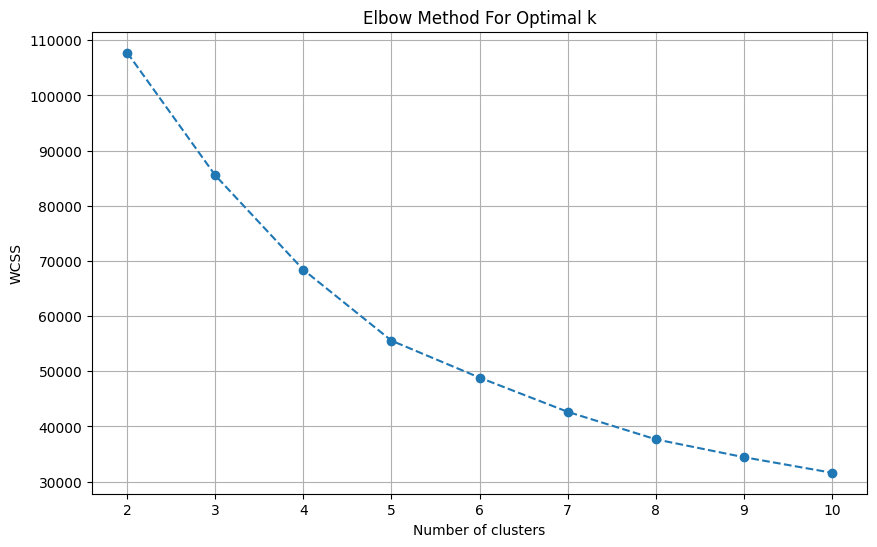

In [ ]:
from sklearn.cluster import KMeans
# Redefining clustering_features
clustering_features = network_features_df_scaled.drop('PaperID', axis=1)

# Determining the optimal number of clusters using WCSS and manual Elbow method
wcss = []
cluster_range = range(2, 11)  # Testing from 2 to 10 clusters


for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(clustering_features)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS to find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


In [ ]:
# Applying K-Means Clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(clustering_features)

# Adding cluster labels to the DataFrame
network_features_df_scaled['Cluster'] = cluster_labels

# Examining the distribution of papers across the clusters
cluster_distribution = network_features_df_scaled['Cluster'].value_counts()
cluster_distribution


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3    21266
1     7416
2     3730
4     1973
0      161
Name: Cluster, dtype: int64

In [ ]:
import zipfile
import os

# Extracting the files from the zip
zip_file_path = '/content/Dataset_7.zip'
extract_folder = '/content/Dataset_7/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Listing the extracted files
extracted_files = os.listdir(extract_folder)
extracted_files


['cit-HepPh-temporal.txt', 'cit-HepPh.txt', 'cit-HepPh-dates.txt']

In [ ]:
# Loading the citation network data
file_citations = os.path.join(extract_folder, 'cit-HepPh.txt')
df_citations = pd.read_csv(file_citations, sep='\t', header=None, names=['Citing', 'Cited'])

# Creating a directed graph from the citation data
G = nx.from_pandas_edgelist(df_citations, 'Citing', 'Cited', create_using=nx.DiGraph())

# Computing network features for each node (paper)
pageranks = nx.pagerank(G)
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())
clustering_coeffs = nx.clustering(G)

# Creating a DataFrame for network features
network_features = pd.DataFrame({
    "PaperID": list(G.nodes()),
    "PageRank": list(pageranks.values()),
    "InDegree": list(in_degrees.values()),
    "OutDegree": list(out_degrees.values()),
    "ClusteringCoeff": list(clustering_coeffs.values())
})

# Scaling the network features
scaler = StandardScaler()
network_features_scaled = network_features.copy()
network_features_scaled[['PageRank', 'InDegree', 'OutDegree', 'ClusteringCoeff']] = scaler.fit_transform(network_features[['PageRank', 'InDegree', 'OutDegree', 'ClusteringCoeff']])

# Dropping the PaperID column for clustering
clustering_features = network_features_scaled.drop('PaperID', axis=1)

# Applying K-Means Clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(clustering_features)

# Adding cluster labels to the DataFrame
network_features_scaled['Cluster'] = cluster_labels

# Checking the distribution of papers across the clusters
cluster_distribution = network_features_scaled['Cluster'].value_counts()
cluster_distribution


<ipython-input-33-8ce2e94529a6>:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_citations = pd.read_csv(file_citations, sep='\t', header=None, names=['Citing', 'Cited'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    35577
1    12308
3     6186
2     2529
4      163
Name: Cluster, dtype: int64

In [ ]:
from sklearn.ensemble import IsolationForest

# Applying Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
anomalies = iso_forest.fit_predict(clustering_features)

# Adding anomaly labels to the DataFrame (anomalies are labeled as -1)
network_features_scaled['Anomaly'] = anomalies

# Counting the number of anomalies detected
anomaly_counts = (network_features_scaled['Anomaly'] == -1).sum()
anomaly_counts, network_features_scaled.head()


(7564,
                                              PaperID  PageRank  InDegree  \
 0  # Directed graph (each unordered pair of nodes... -0.271730 -0.499360   
 1                                                NaN  0.489467 -0.297654   
 2  # Paper citation network of Arxiv High Energy ... -0.271730 -0.499360   
 3                       # Nodes: 34546 Edges: 421578 -0.271730 -0.499360   
 4                                       # FromNodeId -0.271730 -0.499360   
 
    OutDegree  ClusteringCoeff  Cluster  Anomaly  
 0  -0.483727        -0.810222        0        1  
 1  -0.558991        -0.810222        0        1  
 2  -0.483727        -0.810222        0        1  
 3  -0.483727        -0.810222        0        1  
 4  -0.483727        -0.810222        0        1  )

In [ ]:
# Converting 'PaperID' to string and then filtering out non-digit entries
network_features_clean = network_features_scaled.copy()
network_features_clean['PaperID'] = network_features_clean['PaperID'].astype(str)
network_features_clean = network_features_clean[network_features_clean['PaperID'].str.isdigit()]

# Reapplying Isolation Forest for anomaly detection on the cleaned dataset
anomalies_clean = iso_forest_clean.fit_predict(network_features_clean.drop(['PaperID', 'Cluster', 'Anomaly'], axis=1))

# Adding cleaned anomaly labels to the DataFrame
network_features_clean['Anomaly'] = anomalies_clean
# Recreating the Isolation Forest instance
iso_forest_clean = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Reapplying Isolation Forest for anomaly detection
anomalies_clean = iso_forest_clean.fit_predict(network_features_clean.drop(['PaperID', 'Cluster', 'Anomaly'], axis=1))

# Adding cleaned anomaly labels to the DataFrame
network_features_clean['Anomaly'] = anomalies_clean

# Counting the number of anomalies detected in the cleaned dataset
anomaly_counts_clean = (network_features_clean['Anomaly'] == -1).sum()
anomaly_counts_clean, network_features_clean.head()


(7947,
     PaperID   PageRank  InDegree  OutDegree  ClusteringCoeff  Cluster  Anomaly
 6   9907233  -0.240118 -0.364890   0.268915         0.561924        1        1
 7   9301253  13.603370  1.853874  -0.558991        -0.068225        4       -1
 8   9504304   0.460625  0.576404  -0.558991         0.007348        0        1
 9   9505235   0.220479  0.172993  -0.558991         0.676269        1        1
 10  9506257  -0.142756 -0.095949  -0.483727        -0.385510        0        1)

### **Auto ML**

In [ ]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 81.2 MB/s e

In [ ]:
!pip uninstall scipy
!pip install scipy

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.10.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-41284840.3.18.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? y
  Successfully uninstalled scipy-1.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 23.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.1.0 requires scipy~=1.10.1, but you have s

In [ ]:
from pycaret.regression import *

# Initialize the setup
reg_experiment = setup(data=network_features_df_scaled, target='PageRank', session_id=123)

# Create individual models
lr = create_model('lr')
rf = create_model('rf')
gbr = create_model('gbr')



,Description,Value
0,Session id,123
1,Target,PageRank
2,Target type,Regression
3,Original data shape,"(34546, 6)"
4,Transformed data shape,"(34546, 6)"
5,Transformed train set shape,"(24182, 6)"
6,Transformed test set shape,"(10364, 6)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3384,0.8475,0.9206,-0.0000,0.3423,1.0146
1,0.3252,0.6432,0.8020,-0.0006,0.3302,1.1901
2,0.3280,0.7883,0.8878,-0.0004,0.3301,1.0186
3,0.3428,1.0954,1.0466,-0.0000,0.3448,1.0022
4,0.3432,0.8030,0.8961,-0.0000,0.3482,1.0084
5,0.3205,0.6683,0.8175,-0.0004,0.3266,1.0175
6,0.3184,0.5976,0.7731,-0.0009,0.3233,1.0233
7,0.3479,1.1783,1.0855,-0.0001,0.3477,0.9999
8,0.3499,1.2620,1.1234,-0.0000,0.3489,1.0017


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3384,0.8475,0.9206,-0.0000,0.3423,1.0150
1,0.3252,0.6432,0.8020,-0.0006,0.3301,1.1980
2,0.3280,0.7882,0.8878,-0.0003,0.3302,1.0175
3,0.3428,1.0954,1.0466,-0.0000,0.3448,1.0022
4,0.3433,0.8030,0.8961,-0.0000,0.3481,1.0110
5,0.3204,0.6683,0.8175,-0.0004,0.3267,1.0170
6,0.3184,0.5976,0.7731,-0.0009,0.3233,1.0231
7,0.3479,1.1783,1.0855,-0.0001,0.3477,0.9999
8,0.3499,1.2620,1.1234,-0.0000,0.3489,1.0017


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3415,0.8463,0.9199,0.0015,0.3384,1.0706
1,0.3226,0.6424,0.8015,0.0007,0.3315,1.0357
2,0.3260,0.7872,0.8873,0.0010,0.3315,0.9982
3,0.3497,1.0937,1.0458,0.0016,0.3367,1.0896
4,0.3476,0.8021,0.8956,0.0011,0.3430,1.1259
5,0.3180,0.6676,0.8171,0.0006,0.3275,0.9978
6,0.3125,0.5973,0.7729,-0.0003,0.3213,1.0030
7,0.3421,1.1787,1.0857,-0.0005,0.3411,0.9966
8,0.3513,1.2569,1.1211,0.0040,0.3455,1.0157


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### **ENSEMBLE MODEL**

In [ ]:
# Blend models
blended = blend_models(estimator_list=[lr, rf, gbr])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3394,0.8471,0.9204,0.0005,0.3410,1.0330
1,0.3243,0.6429,0.8018,-0.0001,0.3310,1.1137
2,0.3273,0.7879,0.8876,0.0001,0.3308,1.0105
3,0.3451,1.0948,1.0463,0.0005,0.3421,1.0262
4,0.3447,0.8027,0.8959,0.0004,0.3464,1.0462
5,0.3196,0.6680,0.8173,-0.0001,0.3275,1.0078
6,0.3164,0.5975,0.7730,-0.0006,0.3255,1.0008
7,0.3460,1.1784,1.0856,-0.0002,0.3454,0.9958
8,0.3504,1.2603,1.1226,0.0013,0.3478,1.0060


Processing:   0%|          | 0/6 [00:00<?, ?it/s]